# E-Commerce Data Analysis Project

## Objective
To analyze customer orders, revenue, and trends using SQL and Python.

## Tools Used
- MySQL
- Python
- Pandas
- Matplotlib
- Jupyter Notebook


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
import pandas as pd

orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
order_payments = pd.read_csv('order_payments.csv')
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')


In [7]:
orders.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10.56.33,2017-10-02 11.07.15,2017-10-04 19.55.00,2017-10-10 21.25.13,2017-10-18 0.00.00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20.41.37,2018-07-26 3.24.27,2018-07-26 14.31.00,2018-08-07 15.27.45,2018-08-13 0.00.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8.38.49,2018-08-08 8.55.23,2018-08-08 13.50.00,2018-08-17 18.06.29,2018-09-04 0.00.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19.28.06,2017-11-18 19.45.59,2017-11-22 13.39.59,2017-12-02 0.28.42,2017-12-15 0.00.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21.18.39,2018-02-13 22.20.29,2018-02-14 19.46.34,2018-02-16 18.17.02,2018-02-26 0.00.00


In [8]:
orders['order_purchase_timestamp'] = orders['order_purchase_timestamp'].str.replace('.', ':', regex=False)


In [9]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    errors='coerce'
)


In [10]:
orders['order_purchase_timestamp'].head()


0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [11]:
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')


In [12]:
#Chart 1: Orders Per Month

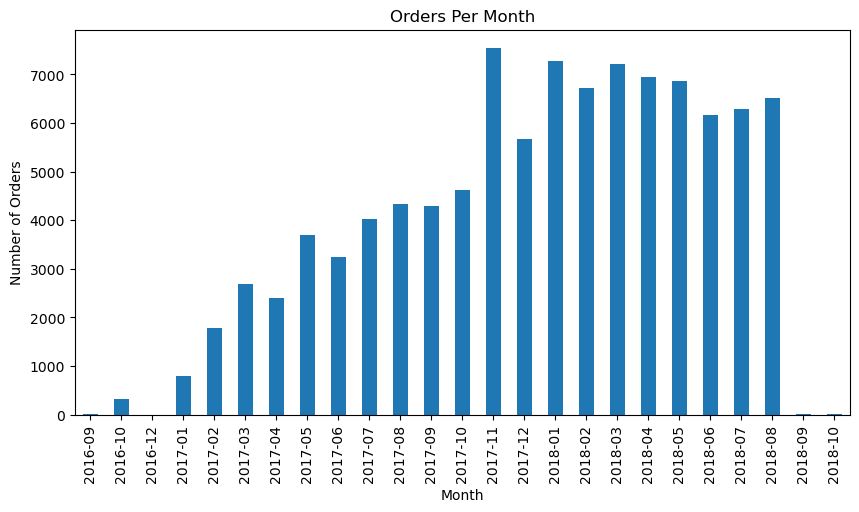

In [13]:
plt.figure(figsize=(10,5))

orders['month'].value_counts().sort_index().plot(kind='bar')

plt.title('Orders Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

plt.show()


In [14]:
# Orders Per Month
#This chart shows growth trend of orders over time.
#We can observe higher order volume in 2018 compared to 2017.


In [15]:
#Chart 2 :Top 10 Customers by Orders

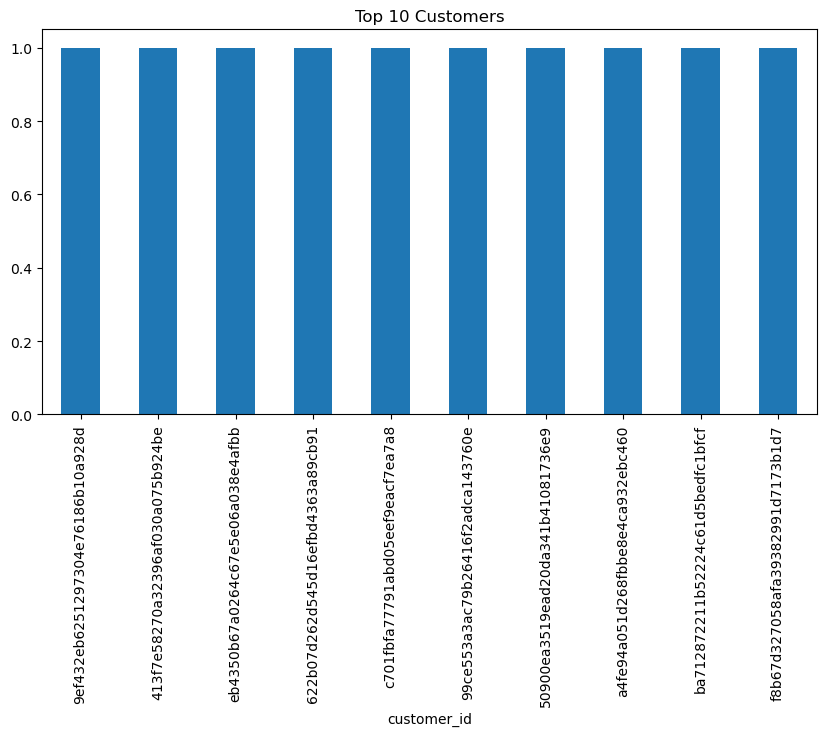

In [16]:
top_customers = orders['customer_id'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_customers.plot(kind='bar')
plt.title('Top 10 Customers')
plt.show()


In [17]:
#Revenue Chart

In [18]:
total_revenue = order_items['price'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 13591643.700000003


## Key Insights
- Orders increased steadily month by month.
- Top customers contributed significant revenue.
- Revenue distribution shows strong sales consistency.


BASIC PROBLEMS

In [19]:
#1.List of  all unique cities where customers are located.

In [20]:
customers['customer_city'].unique()


array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [21]:
#2. Count number of orders placed in 2017.

In [22]:
orders_2017 = orders[
    orders['order_purchase_timestamp'].astype(str).str.startswith('2017')
]
len(orders_2017)


45101

In [23]:
#3.Total Sales Per Category

In [24]:
products = pd.read_csv("products.csv")
products.head()


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
products.columns


Index(['product_id', 'product category', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [26]:
merged = order_items.merge(products, on='product_id')


In [27]:
sales_category = merged.groupby('product category')['price'].sum()


In [28]:
sales_category = sales_category.sort_values(ascending=False)


In [29]:
sales_category


product category
HEALTH BEAUTY                  1258681.34
Watches present                1205005.68
bed table bath                 1036988.68
sport leisure                   988048.97
computer accessories            911954.32
                                  ...    
flowers                           1110.04
House Comfort 2                    760.27
cds music dvds                     730.00
Fashion Children's Clothing        569.85
insurance and services             283.29
Name: price, Length: 73, dtype: float64

In [30]:
merged = order_items.merge(products, on='product_id')
sales_category = merged.groupby('product category')['price'].sum().sort_values(ascending=False)
sales_category


product category
HEALTH BEAUTY                  1258681.34
Watches present                1205005.68
bed table bath                 1036988.68
sport leisure                   988048.97
computer accessories            911954.32
                                  ...    
flowers                           1110.04
House Comfort 2                    760.27
cds music dvds                     730.00
Fashion Children's Clothing        569.85
insurance and services             283.29
Name: price, Length: 73, dtype: float64

In [31]:
#4.Calculate the percentage of orders that were paid in installments.

In [32]:
payments = pd.read_csv('order_payments.csv')


In [33]:
total_orders = payments['order_id'].nunique()
installment_orders = payments[payments['payment_installments'] > 1]['order_id'].nunique()

percentage = (installment_orders / total_orders) * 100
round(percentage, 2)


51.46

In [34]:
#5.Count the number of customers from each state

In [35]:
customers.groupby('customer_state')['customer_id'].count().sort_values(ascending=False)


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

INTERMEDAITE PROBLEMS

In [36]:
#1.Number of Orders Per Month in 2018

In [37]:
# 1. Convert to datetime safely
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    errors='coerce'
)

# 2. Filter 2018
orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

# 3. Create month column
orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.to_period('M')

# 4. Group
orders_2018.groupby('month')['order_id'].count()


C:\Users\vishv\AppData\Local\Temp\ipykernel_21408\2515522310.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_2018['month'] = orders_2018['order_purchase_timestamp'].dt.to_period('M')


month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64

In [38]:
orders['order_purchase_timestamp'].head()


0   2017-10-02 10:56:33
1   2018-07-24 20:41:37
2   2018-08-08 08:38:49
3   2017-11-18 19:28:06
4   2018-02-13 21:18:39
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [39]:
import pandas as pd

orders = pd.read_csv("orders.csv")


In [40]:
orders['order_purchase_timestamp'].head()


0    2017-10-02 10.56.33
1    2018-07-24 20.41.37
2     2018-08-08 8.38.49
3    2017-11-18 19.28.06
4    2018-02-13 21.18.39
Name: order_purchase_timestamp, dtype: object

In [41]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    format='%Y-%m-%d %H.%M.%S'
)


In [42]:
orders['order_purchase_timestamp'].head()
orders['order_purchase_timestamp'].isna().sum()


0

In [43]:
orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    format='%Y-%m-%d %H.%M.%S'
)

orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018].copy()

orders_2018.loc[:, 'month'] = orders_2018['order_purchase_timestamp'].dt.to_period('M')

orders_2018.groupby('month')['order_id'].count()


month
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64

In [44]:
#2.Average Number of Products per Order by Customer City

In [45]:
import pandas as pd

orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
customers = pd.read_csv('customers.csv')


In [46]:
# Count products per order
order_counts = (
    order_items
    .groupby('order_id')['product_id']
    .count()
    .reset_index(name='product_count')
)

# Merge with orders
merged = order_counts.merge(orders, on='order_id', how='left')

# Merge with customers
merged = merged.merge(customers, on='customer_id', how='left')

# Final result
avg_products_city = (
    merged
    .groupby('customer_city')['product_count']
    .mean()
    .sort_values(ascending=False)
)

avg_products_city


customer_city
padre carvalho    7.0
celso ramos       6.5
candido godoi     6.0
datas             6.0
matias olimpio    5.0
                 ... 
indiana           1.0
indianopolis      1.0
indiapora         1.0
indiaroba         1.0
zortea            1.0
Name: product_count, Length: 4110, dtype: float64

In [47]:
#3.Percentage of Total Revenue by Product 

In [48]:
import pandas as pd

orders = pd.read_csv("orders.csv")
order_items = pd.read_csv("order_items.csv")
products = pd.read_csv("products.csv")


In [49]:
merged = order_items.merge(products, on='product_id', how='left')


In [50]:
category_revenue = (
    merged.groupby('product category')['price']
    .sum()
)


In [51]:
percentage = (category_revenue / category_revenue.sum()) * 100
percentage = percentage.sort_values(ascending=False)

percentage


product category
HEALTH BEAUTY                  9.384664
Watches present                8.984461
bed table bath                 7.731735
sport leisure                  7.366843
computer accessories           6.799485
                                 ...   
flowers                        0.008276
House Comfort 2                0.005669
cds music dvds                 0.005443
Fashion Children's Clothing    0.004249
insurance and services         0.002112
Name: price, Length: 73, dtype: float64

In [52]:
products.columns = products.columns.str.strip()
order_items.columns = order_items.columns.str.strip()



In [53]:
#4.Correlation Between Price and Purchase Count

In [54]:
product_stats = order_items.groupby('product_id').agg({
    'price': 'mean',
    'order_id': 'count'
})

product_stats.corr()


,price,order_id
price,1.00000,-0.03214
order_id,-0.03214,1.00000


In [55]:
#5.Total Revenue per Seller & Ranking

In [56]:
seller_revenue = order_items.groupby('seller_id')['price'].sum().sort_values(ascending=False)

seller_revenue.rank(ascending=False)


seller_id
4869f7a5dfa277a7dca6462dcf3b52b2       1.0
53243585a1d6dc2643021fd1853d8905       2.0
4a3ca9315b744ce9f8e9374361493884       3.0
fa1c13f2614d7b5c4749cbc52fecda94       4.0
7c67e1448b00f6e969d365cea6b010ab       5.0
                                     ...  
34aefe746cd81b7f3b23253ea28bef39    3091.0
702835e4b785b67a084280efca355756    3092.0
1fa2d3def6adfa70e58c276bb64fe5bb    3093.0
77128dec4bec4878c37ab7d6169d6f26    3094.0
cf6f6bc4df3999b9c6440f124fb2f687    3095.0
Name: price, Length: 3095, dtype: float64

ADVANCE PROBLEMS

In [111]:
import pandas as pd

orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
order_payments = pd.read_csv('order_payments.csv')
customers = pd.read_csv('customers.csv')
products = pd.read_csv('products.csv')


In [112]:
orders['order_purchase_timestamp'].head(20)


0     2017-10-02 10.56.33
1     2018-07-24 20.41.37
2      2018-08-08 8.38.49
3     2017-11-18 19.28.06
4     2018-02-13 21.18.39
5     2017-07-09 21.57.05
6     2017-04-11 12.22.08
7     2017-05-16 13.10.30
8     2017-01-23 18.29.09
9     2017-07-29 11.55.02
10    2017-05-16 19.41.10
11    2017-07-13 19.58.11
12    2018-06-07 10.06.19
13    2018-07-25 17.44.10
14    2018-03-01 14.14.28
15    2018-06-07 19.03.12
16    2018-01-02 19.00.43
17    2017-12-26 23.41.31
18     2017-11-21 0.03.41
19    2017-10-26 15.54.26
Name: order_purchase_timestamp, dtype: object

In [113]:
orders['order_purchase_timestamp'].astype(str).str.len().value_counts()


order_purchase_timestamp
19    85216
18    14225
Name: count, dtype: int64

In [114]:
orders['order_purchase_timestamp'].sample(10)


67628     2018-02-18 0.17.13
98575    2018-08-28 19.44.25
7839     2018-05-20 16.28.42
22873    2017-11-25 16.09.19
83972    2018-02-14 20.56.34
93590    2017-11-24 10.08.22
46029    2017-06-17 15.27.18
49226     2017-04-27 9.25.53
44466    2017-07-28 23.56.31
17389    2017-12-05 10.28.45
Name: order_purchase_timestamp, dtype: object

In [115]:
orders['order_purchase_timestamp'].isin(['', ' ', 'nan', 'None']).sum()


0

In [116]:
orders['order_purchase_timestamp'].astype(str).str.encode('unicode_escape').head(10)


0    b'2017-10-02 10.56.33'
1    b'2018-07-24 20.41.37'
2     b'2018-08-08 8.38.49'
3    b'2017-11-18 19.28.06'
4    b'2018-02-13 21.18.39'
5    b'2017-07-09 21.57.05'
6    b'2017-04-11 12.22.08'
7    b'2017-05-16 13.10.30'
8    b'2017-01-23 18.29.09'
9    b'2017-07-29 11.55.02'
Name: order_purchase_timestamp, dtype: object

In [117]:
orders['order_purchase_timestamp'] = (
    orders['order_purchase_timestamp']
    .astype(str)
    .str.replace('.', ':', regex=False)
)

orders['order_purchase_timestamp'] = pd.to_datetime(
    orders['order_purchase_timestamp'],
    format='%Y-%m-%d %H:%M:%S'
)


In [118]:
orders['order_purchase_timestamp'].head()
orders['order_purchase_timestamp'].isna().sum()


0

In [58]:
#1. Moving Average of Order Value per Customer.

In [119]:
df = orders.merge(order_payments, on='order_id', how='left')
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11.07.15,2017-10-04 19.55.00,2017-10-10 21.25.13,2017-10-18 0.00.00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11.07.15,2017-10-04 19.55.00,2017-10-10 21.25.13,2017-10-18 0.00.00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11.07.15,2017-10-04 19.55.00,2017-10-10 21.25.13,2017-10-18 0.00.00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3.24.27,2018-07-26 14.31.00,2018-08-07 15.27.45,2018-08-13 0.00.00,1.0,UPI,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 8.55.23,2018-08-08 13.50.00,2018-08-17 18.06.29,2018-09-04 0.00.00,1.0,credit_card,3.0,179.12


In [120]:
df = df.sort_values(['customer_id', 'order_purchase_timestamp'])


In [121]:
df['moving_avg'] = (
    df.groupby('customer_id')['payment_value']
      .rolling(3, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)


In [122]:
df[['customer_id','order_purchase_timestamp','payment_value','moving_avg']].head(20)


,customer_id,order_purchase_timestamp,payment_value,moving_avg
71588,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.740000
10466,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410000
68796,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.420000
45160,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350000
6119,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010000
76896,0004164d20a9e969af783496f3408652,2017-04-12 08:35:12,71.80,71.800000
48296,000419c5494106c306a97b5635748086,2018-03-02 17:47:40,49.40,49.400000
62658,00046a560d407e99b969756e0b10f282,2017-12-18 11:08:30,166.59,166.590000
82777,00050bf6e01e69d5c0fd612f1bcfb69c,2017-09-17 16:04:44,85.23,85.230000
83948,000598caf2ef4117407665ac33275130,2018-08-11 12:14:35,1255.71,1255.710000


In [69]:
# 2.Calculate the cumulative sales per month for each year

In [123]:
df = orders.merge(order_payments, on='order_id', how='left')


In [124]:
df['year'] = df['order_purchase_timestamp'].dt.year
df['month'] = df['order_purchase_timestamp'].dt.month


In [125]:
df[['order_purchase_timestamp','year','month']].head()


,order_purchase_timestamp,year,month
0,2017-10-02 10:56:33,2017,10
1,2017-10-02 10:56:33,2017,10
2,2017-10-02 10:56:33,2017,10
3,2018-07-24 20:41:37,2018,7
4,2018-08-08 08:38:49,2018,8


In [126]:
monthly_sales = (
    df.groupby(['year','month'])['payment_value']
      .sum()
      .reset_index()
)


In [127]:
monthly_sales = monthly_sales.sort_values(['year','month'])


In [128]:
monthly_sales['cumulative_sales'] = (
    monthly_sales.groupby('year')['payment_value']
                 .cumsum()
)


In [129]:
monthly_sales.head(20)


,year,month,payment_value,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,430396.05
5,2017,3,449863.60,880259.65
6,2017,4,417788.03,1298047.68
7,2017,5,592918.82,1890966.50
8,2017,6,511276.38,2402242.88
9,2017,7,592382.92,2994625.80


In [131]:
#3. Year-over-Year Growth Rate

In [132]:
yearly_sales = (
    df.groupby('year')['payment_value']
      .sum()
      .reset_index()
)


In [133]:
yearly_sales


,year,payment_value
0,2016,59362.34
1,2017,7249746.73
2,2018,8699763.05


In [135]:
yearly_sales = yearly_sales.sort_values('year')


In [136]:
yearly_sales['previous_year_sales'] = yearly_sales['payment_value'].shift(1)


In [137]:
yearly_sales['yoy_growth_percent'] = (
    (yearly_sales['payment_value'] - yearly_sales['previous_year_sales'])
    / yearly_sales['previous_year_sales']
) * 100


In [138]:
yearly_sales


,year,payment_value,previous_year_sales,yoy_growth_percent
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.703761
2,2018,8699763.05,7249746.73,20.000924


In [85]:
#4. Customer Retention Rate (6 Months)

In [139]:
first_purchase = (
    df.groupby('customer_id')['order_purchase_timestamp']
      .min()
      .reset_index()
)

first_purchase.columns = ['customer_id', 'first_purchase_date']


In [140]:
merged = df.merge(first_purchase, on='customer_id', how='left')


In [141]:
repeat_orders = merged[
    (merged['order_purchase_timestamp'] > merged['first_purchase_date']) &
    (merged['order_purchase_timestamp'] <= 
     merged['first_purchase_date'] + pd.DateOffset(months=6))
]


In [143]:
total_customers = first_purchase['customer_id'].nunique()
repeat_customers = repeat_orders['customer_id'].nunique()


In [144]:
# Count customers
total_customers = first_purchase['customer_id'].nunique()
repeat_customers = repeat_orders['customer_id'].nunique()

# Retention %
retention_rate = (repeat_customers / total_customers) * 100
round(retention_rate, 2)


0.0

In [110]:
#5. Top 3 Customers per Year by Spend

In [145]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])


In [146]:
orders['year'] = orders['order_purchase_timestamp'].dt.year


In [149]:
df = orders.merge(order_payments, on='order_id', how='left')


In [150]:
spend = (
    df.groupby(['year','customer_id'])['payment_value']
      .sum()
      .reset_index()
)


In [151]:
spend['rank'] = spend.groupby('year')['payment_value'] \
                     .rank(method='dense', ascending=False)


In [152]:
top3_customers = spend[spend['rank'] <= 3] \
                    .sort_values(['year','rank'])

top3_customers


,year,customer_id,payment_value,rank
223,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1.0
38,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2.0
84,2016,4a06381959b6670756de02e07b83815f,1227.78,3.0
4218,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1.0
35453,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2.0
11541,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3.0
95349,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1.0
97087,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2.0
92873,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3.0
